# Should you wear a coat today?

This notebook contains code that creates a simple machine learning model that helps the user decide whether if they should wear a coat today.

The model takes the following three inputs:


*   Temperature (Celcius)
*   Precipitation (percent)
*   Wind speed (mph)


Depending on the input values, the model predicts whether a coat is required and outputs a statement: "It is TRUE/FALSE that you should wear a coat today"


**Step 1**

Import the packages required to make the code work

In [ ]:
from sklearn.linear_model import LinearRegression
from random import randint

**Step 2**

Train a machine learning model by creating a fake dataset of weather conditions and whether or not a coat is required

In [ ]:
# Set some limits for the maximum temperature (C), precipitation probability (%), and wind speed (mph)
TEMPERATURE_LIMIT = 40
PRECIPITATION_CHANCE_LIMIT = 100
WIND_SPEED_LIMIT = 70

# Set a limit for the number of rows you want to create in your fake dataset
DATASET_ROWS = 1000

# Create two empty lists, one for the weather conditions (TRAINING_INPUT) and one for the coat requirement (TRAINING_OUTPUT)
TRAINING_INPUT = list()
TRAINING_OUTPUT = list()

# Create the fake dataset using a 'for loop'
# A for loop takes the code written below it and repeats it a given number of times
# In this example, the for loop will run the code it contains 1000 times, as that is how big DATASET_ROWS is
for i in range(DATASET_ROWS):

    # define the three weather conditions using a random number generator and the limits you have defined above
    # e.g. temp_c is a random number between 0 and 40
    temp_c = randint(0, TEMPERATURE_LIMIT)
    precip_percent = randint(0, PRECIPITATION_CHANCE_LIMIT)
    wind_mph = randint(0, WIND_SPEED_LIMIT)

    # the weather conditions are summed and made into a score
    # a higher score means the weather is worse (colder temperature, greater chance of rain, and higher winds)
    weather_conditions_score = (TEMPERATURE_LIMIT-temp_c) + precip_percent + wind_mph

    # if the sum of the weather conditions is greater than 110 (an arbitrary number chosen by me), then wear_coat is given a value of 1
    if weather_conditions_score >= 110:
        wear_coat = 1
    else:
    # if the sum of the weather conditions is less than 110, then wear_coat is given a value of -1
        wear_coat = -1

    # the fake weather conditions are added to the TRAINING_INOUT list defined before the for loop
    TRAINING_INPUT.append([temp_c, precip_percent, wind_mph])

    # for the fake weather conditions, whether or not a coat is reauired is added to the TRAINING_OUTPUT list defined before the for loop
    TRAINING_OUTPUT.append(wear_coat)


# This code lies outside of the above for loop, so runs after the for loop has finished
# Create the machine learning model and give it the TRAINING_INPUT and TRAINING_OUTPUT lists
predictor = LinearRegression(n_jobs=-1)
predictor.fit(X=TRAINING_INPUT, y=TRAINING_OUTPUT)

LinearRegression(n_jobs=-1)

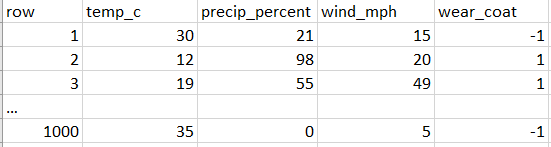

**Step 3**

Ask the user to define the weather conditions

Call the machine learning model and ask it to predict whether a coat is required for the weather conditions defined by the user

In [ ]:
# Ask the user to input values for temperature, precipitation, and wind speed
temp = int(input('input temperature (celcius): '))
precip = int(input('input precipitation (percent): '))
wind = int(input('input wind speed (mph): '))

# Create a variable called TEST that contains the weather conditions defined by the user
# float() makes sure the values given by the user are read by the code as integer numbers
TEST = [[temp, precip, wind]]

# Create an outcome by calling the machine learning model and asking it to make a pediction on TEST
outcome = predictor.predict(TEST)

if outcome > 0:
  answer = True
else:
  answer = False

# Print out the answer to the user's question
print(f'Outcome : {outcome} \n Given the weather conditions you provided: \n Temperature: {temp}C \n Precipitation: {precip}% \n Wind Speed: {wind}mph \n\n It is {answer} that you should wear a coat today')

input temperature (celcius): 12
input precipitation (percent): 34
input wind speed (mph): 9
Outcome : [-0.76134108] 
 Given the weather conditions you provided: 
 Temperature: 12C 
 Precipitation: 34% 
 Wind Speed: 9mph 

 It is False that you should wear a coat today


**Step 4**

You can start to take this application further

Even on warm days with low wind speed, if there is a decent chance that there will be rain the user would probably be better of taking a coat with them

You can make modifications to the code that allow for cases like this:

In [ ]:
temp = int(input('input temperature (celcius): '))
precip = int(input('input precipitation (percent): '))
wind = int(input('input wind speed (mph): '))

TEST = [[temp, precip, wind]]
outcome = predictor.predict(TEST)

if outcome > 0:
  answer = True
# if the chance of precipitation is greater than 50%, override the model's output and tell the user to take a coat with them
elif precip > 50:
  answer = True
else:
  answer = False

print(f'\n\n Outcome : {outcome} \n Given the weather conditions you provided: \n Temperature: {temp}C \n Precipitation: {precip}% \n Wind Speed: {wind}mph \n\n It is {answer} that you should wear a coat today')

input temperature (celcius): 12
input precipitation (percent): 79
input wind speed (mph): 2


 Outcome : [0.09529519] 
 Given the weather conditions you provided: 
 Temperature: 12C 
 Precipitation: 79% 
 Wind Speed: 2mph 

 It is True that you should wear a coat today


# Taking this code to your team

This machine learning model does not serve a great purpose, as people are very good at looking out of the window and deciding on whether or not they will need a coat!

But the basics of the code are applicable to other, more complicated situations. For example, what if you had the call centre records and complaint history for 500,000 customers and wanted to create a model from this data that will help prioritise customers who seem likely to raise a complaint?

Data such as:

*   the number of times the customer has called us,
*   how long the customer has waited to get through,
*   the topics the customer wants to speak to us about,
*   the tone of the customer's interaction

becomes the TRAINING_INPUT data for a machine learning model, and whether or not the customer raised a complaint after their interaction with us becomes the TRAINING_OUTPUT data for the model.

The model can then be asked to predict if, based on call history, wait time, topic, and tone, a given customer is at risk of raising a complaint.



To get started, you need just three things:
1. *A dataset* - you should remove any PII or bias from your data
2. *Some infrastructure* - this can be as simple as a Google Colab notebook, like this one
3. *A goal* - what would you like the machine learning model to help you understand?